# Bharat inter Task-3

## Number Recoginition

#### import libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

### Load MNIST dataset

In [2]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Normalize the pixel values to a range of [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
# Build a neural network model
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')])

In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
# Train the model
model.fit(x_train, y_train, epochs=5)

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2945 - accuracy: 0.9150
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1419 - accuracy: 0.9578
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1038 - accuracy: 0.9692
Epoch 4/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0860 - accuracy: 0.9736
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0740 - accuracy: 0.9766
313/313 - 1s - loss: 0.0750 - accuracy: 0.9777 - 1s/epoch - 3ms/step

Test accuracy: 0.9776999950408936


In [7]:
def predict_digit(image):
    image = image.reshape(1, 28, 28)
    image = image / 255.0
    prediction = model.predict(image)
    predicted_digit = prediction.argmax()
    return predicted_digit

In [8]:
# Example usage
sample_image = x_test[0]
predicted_digit = predict_digit(sample_image)
print("Predicted digit:", predicted_digit)

1/1 [==============================] - 0s 180ms/step
Predicted digit: 5


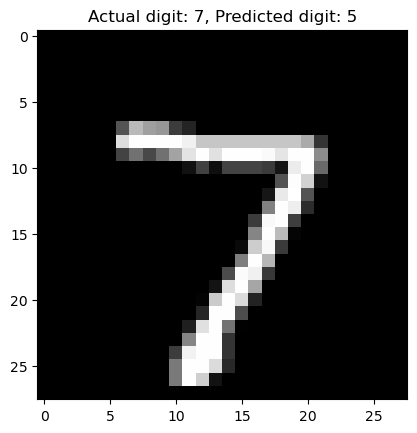

In [9]:
# Display the sample image and its label
plt.figure()
plt.imshow(sample_image, cmap='gray')
plt.title(f"Actual digit: {y_test[0]}, Predicted digit: {predicted_digit}")
plt.show()

In [16]:
df_features = x_train[:, :784]
df_label = y_train
X_test = x_test[:, :784]
print(X_test.shape)

(10000, 28, 28)


In [19]:
X_train = X_train.astype('float32'); X_cv= X_cv.astype('float32'); X_test = X_test.astype('float32')
X_train /= 255; X_cv /= 255; X_test /= 255

# Convert labels to One Hot Encoded
num_digits = 10
y_train = keras.utils.to_categorical(y_train, num_digits)
y_cv = keras.utils.to_categorical(y_cv, num_digits)

In [20]:
print(y_train[0]) 
print(y_train[3]) 

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [21]:
n_input = 784 # number of features
n_hidden_1 = 300
n_hidden_2 = 100
n_hidden_3 = 100
n_hidden_4 = 200
num_digits = 10

In [25]:
from tensorflow.keras.layers import Input, Dense
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)

In [27]:
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers

In [28]:
model = Model(Inp, output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 300)               235500    
                                                                 
 Hidden_Layer_2 (Dense)      (None, 100)               30100     
                                                                 
 Hidden_Layer_3 (Dense)      (None, 100)               10100     
                                                                 
 Hidden_Layer_4 (Dense)      (None, 200)               20200     
                                                                 
 Output_Layer (Dense)        (None, 10)                2010      
                                                                 
Total params: 297910 (1.14 MB)
Trainable params: 297910 (1.14

In [29]:
learning_rate = 0.1
training_epochs = 20
batch_size = 100
sgd = optimizers.SGD(lr=learning_rate)

In [42]:
adam = keras.optimizers.Adam(lr=learning_rate)
model1 = Model(Inp, output)


In [43]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [44]:
history1 = model.fit(X_train, y_train,
                     batch_size = batch_size,
                     epochs = training_epochs,
                     verbose = 2,
                     validation_data=(X_cv, y_cv))

Epoch 1/20
1500/1500 - 16s - loss: 2.3000 - accuracy: 0.1160 - val_loss: 2.2996 - val_accuracy: 0.1128 - 16s/epoch - 11ms/step
Epoch 2/20
1500/1500 - 13s - loss: 2.2993 - accuracy: 0.1123 - val_loss: 2.2991 - val_accuracy: 0.1128 - 13s/epoch - 9ms/step
Epoch 3/20
1500/1500 - 19s - loss: 2.2990 - accuracy: 0.1129 - val_loss: 2.2988 - val_accuracy: 0.1128 - 19s/epoch - 13ms/step
Epoch 4/20
1500/1500 - 21s - loss: 2.2985 - accuracy: 0.1129 - val_loss: 2.2988 - val_accuracy: 0.1128 - 21s/epoch - 14ms/step
Epoch 5/20
1500/1500 - 19s - loss: 2.2980 - accuracy: 0.1162 - val_loss: 2.2979 - val_accuracy: 0.1128 - 19s/epoch - 12ms/step
Epoch 6/20
1500/1500 - 19s - loss: 2.2974 - accuracy: 0.1123 - val_loss: 2.2974 - val_accuracy: 0.1128 - 19s/epoch - 12ms/step
Epoch 7/20
1500/1500 - 22s - loss: 2.2965 - accuracy: 0.1129 - val_loss: 2.2960 - val_accuracy: 0.1128 - 22s/epoch - 14ms/step
Epoch 8/20
1500/1500 - 9s - loss: 2.2956 - accuracy: 0.1158 - val_loss: 2.2951 - val_accuracy: 0.1128 - 9s/epoch

In [38]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)

# We rely on ADAM as our optimizing methodology

model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [39]:
history2 = model2.fit(X_train, y_train,
                      batch_size = batch_size,
                      epochs = training_epochs,
                      verbose = 2,
                      validation_data=(X_cv, y_cv))

Epoch 1/20
1500/1500 - 9s - loss: 0.7855 - accuracy: 0.7364 - val_loss: 0.4299 - val_accuracy: 0.8666 - 9s/epoch - 6ms/step
Epoch 2/20
1500/1500 - 9s - loss: 0.3203 - accuracy: 0.9023 - val_loss: 0.2277 - val_accuracy: 0.9288 - 9s/epoch - 6ms/step
Epoch 3/20
1500/1500 - 9s - loss: 0.2176 - accuracy: 0.9352 - val_loss: 0.1715 - val_accuracy: 0.9453 - 9s/epoch - 6ms/step
Epoch 4/20
1500/1500 - 9s - loss: 0.1712 - accuracy: 0.9480 - val_loss: 0.1515 - val_accuracy: 0.9518 - 9s/epoch - 6ms/step
Epoch 5/20
1500/1500 - 9s - loss: 0.1402 - accuracy: 0.9571 - val_loss: 0.1193 - val_accuracy: 0.9647 - 9s/epoch - 6ms/step
Epoch 6/20
1500/1500 - 9s - loss: 0.1186 - accuracy: 0.9635 - val_loss: 0.1189 - val_accuracy: 0.9632 - 9s/epoch - 6ms/step
Epoch 7/20
1500/1500 - 12s - loss: 0.1051 - accuracy: 0.9673 - val_loss: 0.1060 - val_accuracy: 0.9668 - 12s/epoch - 8ms/step
Epoch 8/20
1500/1500 - 11s - loss: 0.0911 - accuracy: 0.9716 - val_loss: 0.1117 - val_accuracy: 0.9647 - 11s/epoch - 7ms/step
Epoc

In [45]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)

learning_rate = 0.01
adam = keras.optimizers.Adam(lr=learning_rate)
model2a = Model(Inp, output)

model2a.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [46]:
history2a = model2a.fit(X_train, y_train,
                        batch_size = batch_size,
                        epochs = training_epochs,
                        verbose = 2,
                        validation_data=(X_cv, y_cv))

Epoch 1/20
1500/1500 - 11s - loss: 0.7695 - accuracy: 0.7471 - val_loss: 0.3908 - val_accuracy: 0.8805 - 11s/epoch - 7ms/step
Epoch 2/20
1500/1500 - 9s - loss: 0.3433 - accuracy: 0.8984 - val_loss: 0.2671 - val_accuracy: 0.9175 - 9s/epoch - 6ms/step
Epoch 3/20
1500/1500 - 9s - loss: 0.2328 - accuracy: 0.9308 - val_loss: 0.1854 - val_accuracy: 0.9441 - 9s/epoch - 6ms/step
Epoch 4/20
1500/1500 - 9s - loss: 0.1789 - accuracy: 0.9468 - val_loss: 0.1621 - val_accuracy: 0.9493 - 9s/epoch - 6ms/step
Epoch 5/20
1500/1500 - 9s - loss: 0.1454 - accuracy: 0.9554 - val_loss: 0.1350 - val_accuracy: 0.9585 - 9s/epoch - 6ms/step
Epoch 6/20
1500/1500 - 9s - loss: 0.1215 - accuracy: 0.9632 - val_loss: 0.1118 - val_accuracy: 0.9649 - 9s/epoch - 6ms/step
Epoch 7/20
1500/1500 - 10s - loss: 0.1077 - accuracy: 0.9665 - val_loss: 0.1101 - val_accuracy: 0.9654 - 10s/epoch - 6ms/step
Epoch 8/20
1500/1500 - 9s - loss: 0.0956 - accuracy: 0.9706 - val_loss: 0.0977 - val_accuracy: 0.9703 - 9s/epoch - 6ms/step
Epoc

In [47]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
x = Dropout(0.3)(x)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dropout(0.3)(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
x = Dropout(0.3)(x)
x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)

In [49]:
model2 = Model(Inp, output)
model2.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 300)               235500    
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 Hidden_Layer_2 (Dense)      (None, 100)               30100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 Hidden_Layer_3 (Dense)      (None, 100)               10100     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0   

In [58]:
X_train= 255.0

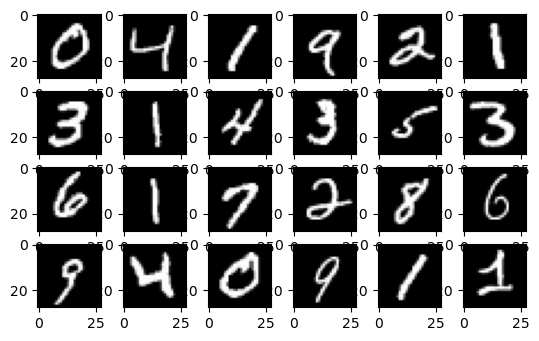

In [67]:
for i in range(1,25):
    plt.subplot(5,6,i)
    plt.imshow(x_train[i],cmap=plt.get_cmap('gray'))